In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg

In [2]:
def gen_in_circle(N, padding, L):
    
    in_circle = np.zeros((N+2*padding,N+2*padding))
    
    center = int(N/2)+padding
    
    # Generate circle     
    for j in range(0, N+2*padding):
        for i in range(0, N+2*padding):
            dist = np.sqrt((i-center)**2+(j-center)**2)/(N/L)
            if dist <= L/2:
                in_circle[j,i] = True
            else:
                in_circle[j,i] = False
                
    return in_circle

In [3]:
def direct_diffusion(N, L=4, radius=2, source=(0.6,1.2), padding=1):
    """
    [3.2A] Performs direct diffusion on circular domain
    """
    
    # Construct 2D array with booleans of whether cell in circle     
    in_circle = gen_in_circle(N, padding, L)
    
    # Generate circle
    U = np.zeros((N, N))
    for j in range(N):
        for i in range(N):
            if in_circle[j+padding,i+padding]:
                U[j,i] = 0.5
                
    # Generate source
    source_j = N-int(N*(1.2+radius)/L)
    source_i = int(N*(0.6+radius)/L)
    
    # Set up M matrix and b vector
    M = np.zeros(((N)**2, (N)**2))
    b = np.zeros((N)**2)
    
    cellcount = 0
    for j in range(N):
        for i in range(N):
                
            # Skip the source
            if j==source_j and i==source_i:
                b[cellcount] = 1
                M[cellcount,cellcount] = 1
                cellcount += 1
                continue
                    
            # Fill in value for cell itself       
            M[cellcount, cellcount] = 4
                
            # Iterate over neighbors:
            if in_circle[j-1+padding, i+padding]:
                M[cellcount, cellcount-N] = -1
                    
            if in_circle[j+1+padding, i+padding]:
                if cellcount+N+padding < len(M[cellcount]):
                    M[cellcount, cellcount+N] = -1
                    
            if in_circle[j+padding, i+1+padding]:
                M[cellcount, cellcount+1] = -1  
                    
            if in_circle[j+padding, i-1+padding]:
                M[cellcount, cellcount-1] = -1
                
            cellcount += 1
    
    x = linalg.solve(M, b)
    
    # Fill in values for U
    count = 0
    for j in range(N):
        for i in range(N):
            U[j,i] = x[count]
            count += 1
    
    return U

N = 101

solution = direct_diffusion(N)

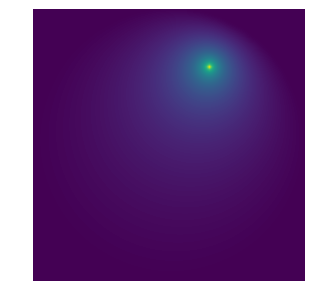

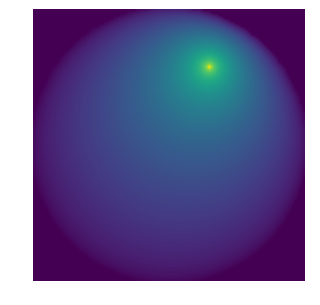

In [14]:
fig = plt.subplots(figsize=(5,5))
plt.imshow(solution, interpolation='bilinear')
plt.axis('off')
plt.savefig('3.2_steadystate.pdf', bbox_inches='tight')
plt.show()

fig = plt.subplots(figsize=(5,5))
plt.imshow(np.sqrt(solution), interpolation='bilinear')
plt.axis('off')
plt.savefig('3.2_steadystate_sqrt.pdf', bbox_inches='tight')
plt.show()

### Code for the Illustration

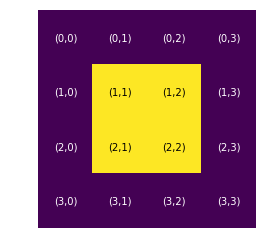

In [13]:
grid = np.zeros((4,4))

in_object = ((1,1), (1,2), (2,1), (2,2))

for j in range(4):
    for i in range(4):
        if (j,i) in in_object:
            grid[j,i] = 1
            plt.text(j,i,f'({i},{j})', ha="center", va="center")
        else:
            plt.text(j,i,f'({i},{j})', ha="center", va="center", color='w') 

plt.imshow(grid)
plt.axis('off')
plt.show()